In [ ]:
TP2 : Estimations et Tests

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("/kaggle/input/data-p-s/Data_TP2.xlsx")
income = data["income"]
mu = income.mean()  
sigma_squared = income.var(ddof=0)  

print(f"Moyenne (µ) : {mu}")
print(f"Variance (σ²) : {sigma_squared}")

Moyenne (µ) : 69.47484375
Variance (σ²) : 6195.644054663076


In [4]:
p_auto = (data["income"] <= 50).mean()
print(f"Proportion des individus avec un revenu ≤ 50 000$ : {p_auto:.2%}")

Proportion des individus avec un revenu ≤ 50 000$ : 56.84%


In [5]:
sample_100 = income.sample(n=100, random_state=42) 
sample_1000 = income.sample(n=1000, random_state=42)

mu_100 = sample_100.mean()
sigma2_100 = sample_100.var(ddof=0)  
mu_1000 = sample_1000.mean()
sigma2_1000 = sample_1000.var(ddof=0)

print(f"Échantillon 100 : Moyenne = {mu_100}, Variance = {sigma2_100}")
print(f"Échantillon 1000 : Moyenne = {mu_1000}, Variance = {sigma2_1000}")

Échantillon 100 : Moyenne = 79.51, Variance = 9030.629900000004
Échantillon 1000 : Moyenne = 69.455, Variance = 6476.375975000008


In [ ]:
biais : l’échantillon de 100 semble surestimer la moyenne, ce qui peut être dû à un biais d’échantillonnage. 
lorsqu’on prend un petit échantillon, il y a plus de chances de tomber sur un sous-ensemble non représentatif de 
la population. 
convergence : lorsque la taille de l’échantillon augmente (1000 individus), la moyenne et la variance se stabilisent et 
deviennent plus proches des valeurs réelles de la population, montrant ainsi la convergence de l’estimateur.

In [20]:
income_gender = data[["income", "gender"]]

hommes = income_gender[income_gender["gender"] == "Homme"]
femmes = income_gender[income_gender["gender"] == "Femme"]

total = len(income_gender)
prop_h = len(hommes) / total
prop_f = len(femmes) / total

sample_100_h = hommes.sample(n=round(100 * prop_h), random_state=42)
sample_100_f = femmes.sample(n=round(100 * prop_f), random_state=42)
sample_100_q = pd.concat([sample_100_h, sample_100_f])

sample_1000_h = hommes.sample(n=round(1000 * prop_h), random_state=42)
sample_1000_f = femmes.sample(n=round(1000 * prop_f), random_state=42)
sample_1000_q = pd.concat([sample_1000_h, sample_1000_f])

mu_100_q = sample_100_q["income"].mean()
sigma2_100_q = sample_100_q["income"].var(ddof=0)

mu_1000_q = sample_1000_q["income"].mean()
sigma2_1000_q = sample_1000_q["income"].var(ddof=0)

print(f"Échantillon 100 (quotas) : Moyenne = {mu_100_q}, Variance = {sigma2_100_q}")
print(f"Échantillon 1000 (quotas) : Moyenne = {mu_1000_q}, Variance = {sigma2_1000_q}")

Échantillon 100 (quotas) : Moyenne = 75.92, Variance = 6377.213599999999
Échantillon 1000 (quotas) : Moyenne = 69.701, Variance = 5673.989598999988


In [ ]:
l’application des quotas réduit l’influence des individus aux revenus élevés, rendant la moyenne plus représentative de 
la population (73.57 contre 79.51 pour un échantillon de 100). 
de plus, la variance diminue (9030.63 sans quotas contre 5887.34 avec quotas), indiquant une meilleure homogénéité et 
une distribution des revenus plus équilibrée. Ainsi, les quotas améliorent la représentativité et la fiabilité des estimations.

In [21]:
def estimate_p(sample):
    return (sample <= 50).mean()

p_100 = estimate_p(sample_100)
p_1000 = estimate_p(sample_1000)
p_100_q = estimate_p(sample_100_q["income"])
p_1000_q = estimate_p(sample_1000_q["income"])

print(f"Proportion q2 : {p_auto:.4f}")
print(f"Échantillon 100 (sans quotas) : Proportion p = {p_100:.4f}")
print(f"Échantillon 1000 (sans quotas) : Proportion p = {p_1000:.4f}")
print(f"Échantillon 100 (avec quotas) : Proportion p = {p_100_q:.4f}")
print(f"Échantillon 1000 (avec quotas) : Proportion p = {p_1000_q:.4f}")

Proportion dans la population : 0.5684
Échantillon 100 (sans quotas) : Proportion p = 0.5800
Échantillon 1000 (sans quotas) : Proportion p = 0.5660
Échantillon 100 (avec quotas) : Proportion p = 0.5100
Échantillon 1000 (avec quotas) : Proportion p = 0.5670


In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

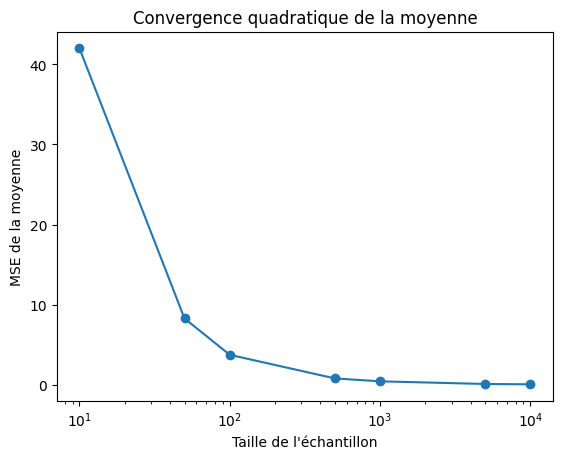

In [11]:
true_mu = 70  
true_sigma = 20  
population = np.random.normal(loc=true_mu, scale=true_sigma, size=100000)
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
mse_values = []

for n in sample_sizes:
    sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(1000)]
    mse = np.mean((np.array(sample_means) - true_mu) ** 2)
    mse_values.append(mse)

plt.plot(sample_sizes, mse_values, marker='o')
plt.xscale("log")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("MSE de la moyenne")
plt.title("Convergence quadratique de la moyenne")
plt.show()

In [22]:
sample_100 = np.random.choice(population, size=100, replace=False)
mu_hypotheses = [70, 72, 90]
alpha = 0.05 

for mu in mu_hypotheses:
    t_stat, p_value = stats.ttest_1samp(sample, mu)
    print(f"Hypothèse H0: µ = {mu}, Statistique t : {t_stat:.4f}, p-valeur : {p_value:.4f}")

Hypothèse H0: µ = 70, Statistique t : 0.9957, p-valeur : 0.3218
Hypothèse H0: µ = 72, Statistique t : 0.7863, p-valeur : 0.4336
Hypothèse H0: µ = 90, Statistique t : -1.0983, p-valeur : 0.2747


In [23]:
variance_hypotheses = [5000, 6200, 8000]
sample_var = np.var(sample_100, ddof=1)
n = len(sample_100)

for var_hyp in variance_hypotheses:
    chi2_stat = (n - 1) * sample_var / var_hyp
    p_value = 2 * min(stats.chi2.cdf(chi2_stat, df=n-1), 1 - stats.chi2.cdf(chi2_stat, df=n-1))
    print(f"H0: Variance = {var_hyp}, Statistique χ² : {chi2_stat:.4f}, p-valeur : {p_value:.4f}")

H0: Variance = 5000, Statistique χ² : 8.7258, p-valeur : 0.0000
H0: Variance = 6200, Statistique χ² : 7.0369, p-valeur : 0.0000
H0: Variance = 8000, Statistique χ² : 5.4536, p-valeur : 0.0000


In [24]:
p_hypotheses = [0.5, 0.55, 0.6]
p_sample = (sample_100 <= 50).mean()

for p0 in p_hypotheses:
    z_stat = (p_sample - p0) / np.sqrt((p0 * (1 - p0)) / n)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    print(f"H0: p = {p0}, Statistique Z : {z_stat:.4f}, p-valeur : {p_value:.4f}")

H0: p = 0.5, Statistique Z : -6.6000, p-valeur : 0.0000
H0: p = 0.55, Statistique Z : -7.6383, p-valeur : 0.0000
H0: p = 0.6, Statistique Z : -8.7773, p-valeur : 0.0000


In [25]:
z_alpha = stats.norm.ppf(1 - alpha/2)
margin_error = z_alpha * (np.std(sample_100, ddof=1) / np.sqrt(n))
IC_lower = np.mean(sample_100) - margin_error
IC_upper = np.mean(sample_100) + margin_error

print(f"Intervalle de confiance à 95% : [{IC_lower:.2f}, {IC_upper:.2f}]")

Intervalle de confiance à 95% : [67.32, 75.55]


In [26]:
shapiro_stat, shapiro_p = stats.shapiro(sample_100)
print(f"Test de Shapiro-Wilk : Statistique={shapiro_stat:.4f}, p-valeur={shapiro_p:.4f}")

Test de Shapiro-Wilk : Statistique=0.9821, p-valeur=0.1930


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


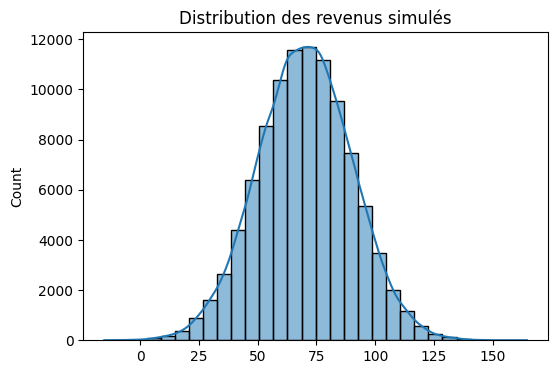

In [27]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(population, kde=True, bins=30)
plt.title("Distribution des revenus simulés")
plt.show()

In [28]:
ks_stat, ks_p = stats.kstest(sample_100, 'norm', args=(np.mean(sample_100), np.std(sample_100)))
print(f"Test de Kolmogorov-Smirnov : Statistique={ks_stat:.4f}, p-valeur={ks_p:.4f}")

Test de Kolmogorov-Smirnov : Statistique=0.0662, p-valeur=0.7481
